# Consumer Electronics Sales Analysis

## Introduction
This project analyzes a Consumer Electronics Sales Dataset to uncover trends, customer behaviors, and predictive insights. The dataset includes 9,000 records with columns like `ProductCategory`, `ProductPrice`, `CustomerAge`, `CustomerGender`, `PurchaseFrequency`, `CustomerSatisfaction`, and `PurchaseIntent`.
## Data Source
This project uses the **Predict Consumer Electronics Sales Dataset** created by **Rabie El Kharoua**. The dataset was sourced from Kaggle: [Predict Consumer Electronics Sales Dataset](https://www.kaggle.com/datasets/rabieelkharoua/consumer-electronics-sales-dataset). 

**Objectives**:
- Identify top-selling products and brands.
- Explore customer demographics and purchasing patterns.
- Predict `PurchaseIntent` to guide marketing strategies.
- Provide actionable recommendations for an electronics business.

**Steps**:
1. Set up the environment.
2. Load and clean the dataset.
3. Perform exploratory data analysis (EDA).
4. Create visualizations.
5. Conduct statistical analysis.
6. Build a predictive model (optional).
7. Summarize findings and make recommendations.


    

Features:

ProductID: Unique identifier for each product.
ProductCategory: Category of the consumer electronics product (e.g., Smartphones, Laptops).
ProductBrand: Brand of the product (e.g., Apple, Samsung).
ProductPrice: Price of the product ($).
CustomerAge: Age of the customer.
CustomerGender: Gender of the customer (0 - Male, 1 - Female).
PurchaseFrequency: Average number of purchases per year.
CustomerSatisfaction: Customer satisfaction rating (1 - 5).
PurchaseIntent (Target Variable): Intent to purchase.

**Loading and Cleaning the Data**

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('consumer_electronics_sales_data.csv')

In [3]:
print("data loaded successfully!")

data loaded successfully!


In [4]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [5]:
print("\nDataset info:")
print(f"Number of rows: {len(df)}")
print(f"columns: {df.columns.tolist()}") #checking for number of rows and the column names before EDA


Dataset info:
Number of rows: 9000
columns: ['ProductID', 'ProductCategory', 'ProductBrand', 'ProductPrice', 'CustomerAge', 'CustomerGender', 'PurchaseFrequency', 'CustomerSatisfaction', 'PurchaseIntent']


In [6]:
print("\nMissing values:")
print(df.isnull().sum()) #looking for any missing values in df before EDA


Missing values:
ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [8]:
gender_map = {0: 'Male', 1: 'Female'}
df['CustomerGenderLabel'] = df['CustomerGender'].map(gender_map)
print("First 5 rows with new CustomerGenderLabel : ")
print(df[['CustomerGender', 'CustomerGenderLabel']].head())
print("\nUnique values in CustomerGenderLabel : ")
print(df['CustomerGenderLabel'].unique())

First 5 rows with new CustomerGenderLabel : 
   CustomerGender CustomerGenderLabel
0               0                Male
1               1              Female
2               0                Male
3               1              Female
4               0                Male

Unique values in CustomerGenderLabel : 
['Male' 'Female']


In [9]:
print(df.memory_usage().sum() / 1024, "KB")

703.25390625 KB


In [10]:
categorical_cols = ['ProductCategory', 'ProductBrand', 'CustomerGenderLabel']
for col in categorical_cols:
    df[col] = df[col].astype('category')
print("\nData types after conversion: ")
print(df.dtypes)  #converting object columns to category type for better memory usage


Data types after conversion: 
ProductID                  int64
ProductCategory         category
ProductBrand            category
ProductPrice             float64
CustomerAge                int64
CustomerGender             int64
PurchaseFrequency          int64
CustomerSatisfaction       int64
PurchaseIntent             int64
CustomerGenderLabel     category
dtype: object


In [11]:
print("memory usage after conversion : ", df.memory_usage().sum() / 1024, "KB")

memory usage after conversion :  519.21875 KB


In [12]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,CustomerGenderLabel
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0,Male
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1,Female
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1,Male
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1,Female
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0,Male


**Exploratory Data Analysis (EDA)**

### Summary Statistics
- Calculate basic statistics (mean, median, etc.) for numerical columns.
- Group data to find:
  - Average price by product category to identify expensive categories.
  - Average purchase frequency by age group to understand buying behavior.

In [13]:
sns.set(style = 'whitegrid')
print("Summary stats for Numerical Columns: ")
print(df[['ProductPrice', 'CustomerAge', 'PurchaseFrequency', 'CustomerSatisfaction', 'PurchaseIntent']].describe())

Summary stats for Numerical Columns: 
       ProductPrice  CustomerAge  PurchaseFrequency  CustomerSatisfaction  \
count   9000.000000  9000.000000        9000.000000           9000.000000   
mean    1527.429195    43.347000          10.054667              2.996000   
std      829.900898    15.055084           5.461328              1.405301   
min      100.376358    18.000000           1.000000              1.000000   
25%      809.165014    30.000000           5.000000              2.000000   
50%     1513.024577    43.000000          10.000000              3.000000   
75%     2244.415520    56.000000          15.000000              4.000000   
max     2999.852253    69.000000          19.000000              5.000000   

       PurchaseIntent  
count     9000.000000  
mean         0.566444  
std          0.495593  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


Product Price:
Minimum: 100.38
Maximum: 2999.85
Average: 1527.43

Customer Age:
Minimum: 18
Maximum: 69
Average: 43.35

Purchase Frequency:
Minimum: 1
Maximum: 19
Average: 10.1

Customer Satisfaction:
Minimum: 1
Maximum: 5
Average: 2.99

In [50]:
print("\nMean price by product category: ")
print(df.groupby('ProductCategory')['ProductPrice'].mean())


Mean price by product category: 
ProductCategory
Headphones       1567.213353
Laptops          1522.446441
Smart Watches    1538.932367
Smartphones      1479.300697
Tablets          1531.848182
Name: ProductPrice, dtype: float64


In [51]:
#now I will create a column of AgeGroup to see the purchase frequency of different items according to different age groups
df['AgeGroup'] = pd.cut(df['CustomerAge'] , bins=[0,18,30,45,60,100] , labels=['<18', '18-30', '31-45', '46-60', '>60'])
print("\nAverage Purchase frequency of different Age groups: ")
print(df.groupby('AgeGroup')['PurchaseFrequency'].mean())


Average Purchase frequency of different Age groups: 
AgeGroup
<18      10.210227
18-30    10.092793
31-45     9.946677
46-60    10.098488
>60      10.092568
Name: PurchaseFrequency, dtype: float64


### Visualizations
- **Histograms**: Show distributions of `ProductPrice`, `CustomerAge`, and `PurchaseFrequency`.
- **Bar Charts**: Show sales counts by `ProductCategory` and `ProductBrand`.

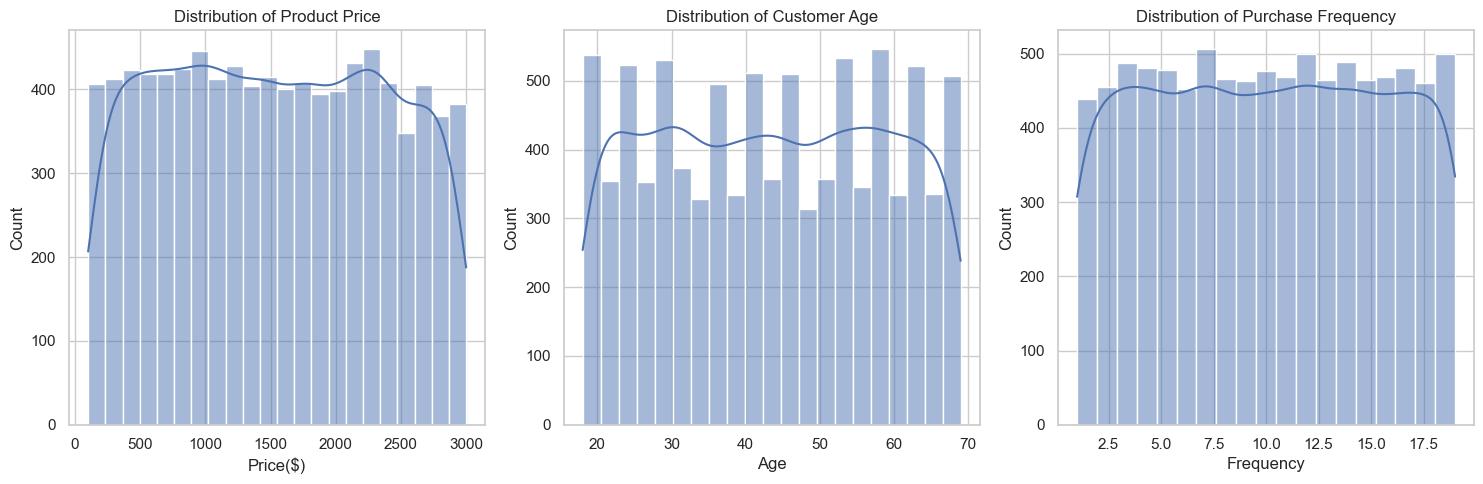

In [16]:
fig, axes = plt.subplots(1, 3, figsize = (15,5)) #1 row, 3 columns, each figure 15 inches wide and 5 inches tall!
sns.histplot(df['ProductPrice'] , ax=axes[0], kde=True) #KDE = Kernel Density Estimate ( a curve to show the distribution's shape)
axes[0].set_title('Distribution of Product Price')  #axes[0] puts the plot in the first slot/column
axes[0].set_xlabel('Price($)')
sns.histplot(df['CustomerAge'], ax=axes[1], kde=True)
axes[1].set_title('Distribution of Customer Age')
axes[1].set_xlabel('Age')
sns.histplot(df['PurchaseFrequency'], ax=axes[2], kde=True)
axes[2].set_title('Distribution of Purchase Frequency')
axes[2].set_xlabel('Frequency')
plt.tight_layout() #Prevents overlapping plots. Works fine without this but is a good practice for 'just in case' conditions
plt.show()

**Distribution of Product Price: 
    Product Price Range: 100.38 - 2999.85
    Products are in Expensive Range.
    
**Distribution of Consumer Age: 
    Age range is 18 - 69
    On looking carefully, there is more population in the middle (20-65), than at the extremes.

**Distribution of Purchase Frequency: 
    The Range is 1 - 19

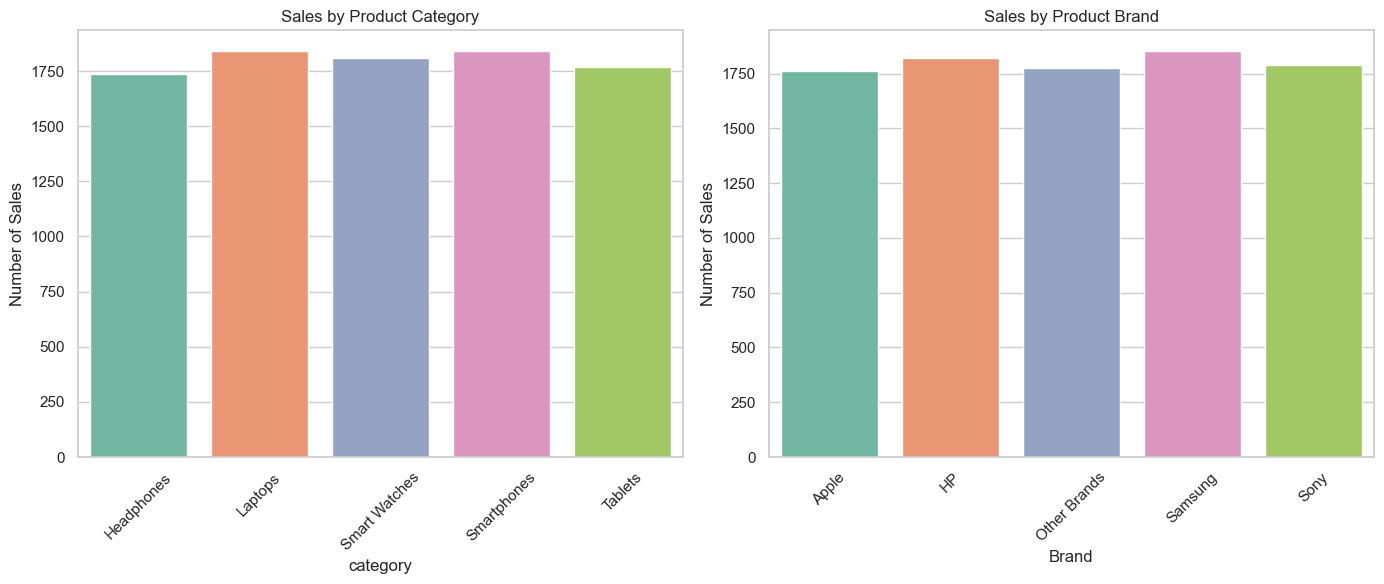

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.countplot(data = df, x='ProductCategory', ax=axes[0], palette='Set2') #Counts occurrences of each category and plots bars.
axes[0].set_title('Sales by Product Category')
axes[0].set_xlabel('category')
axes[0].set_ylabel('Number of Sales')
axes[0].tick_params(axis='x', rotation=45)  #Rotates x-axis labels for readability.
sns.countplot(data = df, x='ProductBrand', ax=axes[1], palette='Set2')
axes[1].set_title('Sales by Product Brand')
axes[1].set_xlabel('Brand')
axes[1].set_ylabel('Number of Sales')
axes[1].tick_params(axis='x', rotation = 45)
plt.tight_layout()
plt.show()

**We've 5 Product Categories:
    Smart Phones
    Smart Watches
    Taplets
    Laptops
    Headphones

**We've 4 Brands and 1 is Other Brands:
    Samsung
    Sony
    HP
    Apple

Now I will try to explore the relationships and trends 

In [18]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,CustomerGenderLabel,AgeGroup
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0,Male,<18
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1,Female,31-45
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1,Male,>60
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1,Female,>60
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0,Male,46-60


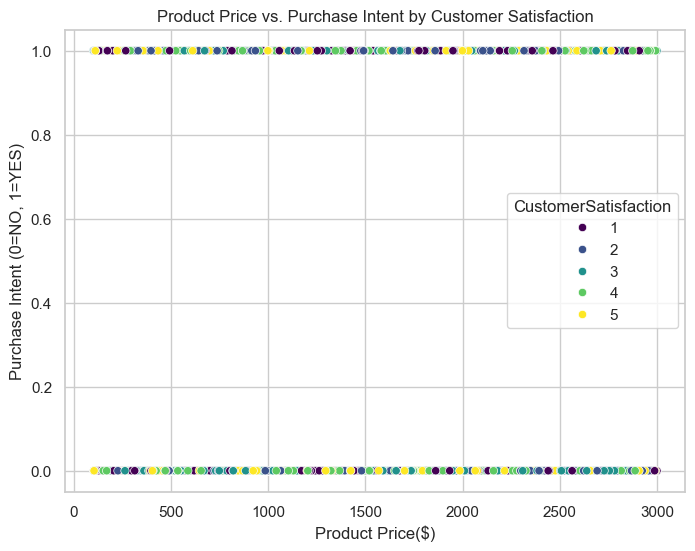

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='ProductPrice', y='PurchaseIntent', hue='CustomerSatisfaction', palette='viridis')
plt.title('Product Price vs. Purchase Intent by Customer Satisfaction')
plt.xlabel('Product Price($)')
plt.ylabel('Purchase Intent (0=NO, 1=YES)')
plt.show()

### Box Plots: Purchase Frequency by Demographics
- Compare `PurchaseFrequency` across `AgeGroup` and `CustomerGenderLabel`.
- Identifies which demographics buy more frequently.

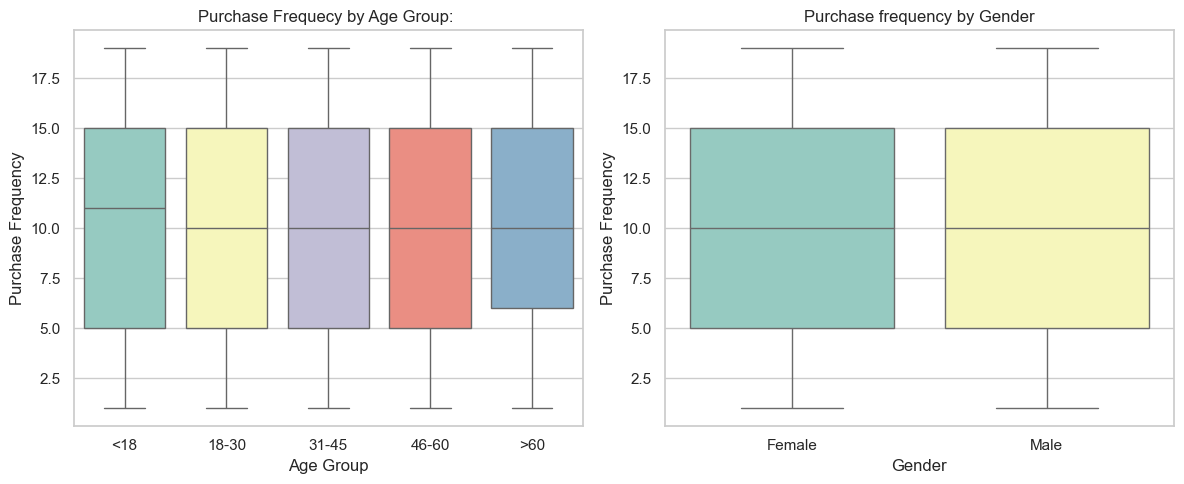

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(data=df, x='AgeGroup', y='PurchaseFrequency', ax=axes[0], palette = 'Set3')
axes[0].set_title('Purchase Frequecy by Age Group: ')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Purchase Frequency')
sns.boxplot(data=df, x='CustomerGenderLabel', y='PurchaseFrequency', ax=axes[1], palette='Set3')
axes[1].set_title('Purchase frequency by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Purchase Frequency')
plt.tight_layout()
plt.show()

## Statistical Analysis

### Correlation Analysis
- Calculate correlations between numerical variables (`ProductPrice`, `CustomerAge`, etc.).
- Identifies relationships, e.g., does high satisfaction increase purchase intent?
### Correlation Heatmap
- Visualizes correlations with colors (red = positive, blue = negative, white/light colors= near 0 correlation).
- Helps identify key relationships for marketing insights.

Correlation Matrix : 


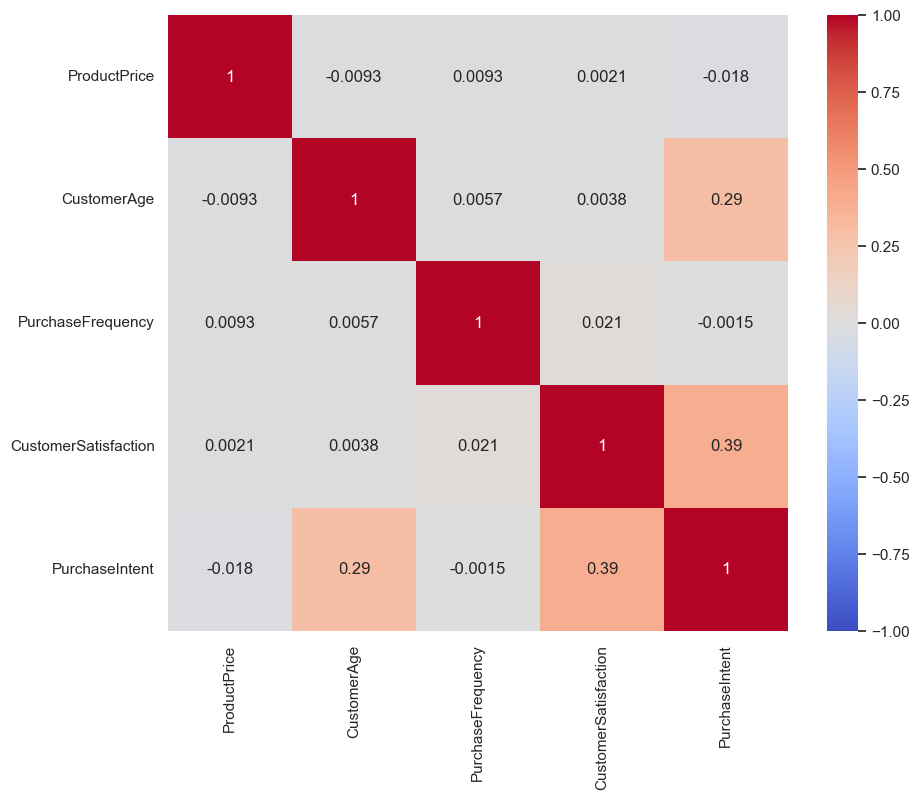

In [21]:
numerical_cols = ['ProductPrice', 'CustomerAge', 'PurchaseFrequency', 'CustomerSatisfaction', 'PurchaseIntent']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
print("Correlation Matrix : ")
# print(corr_matrix)
plt.show()

Correlation is a statistical measure that indicates the strength and direction of the linear relationship between two variables. The correlation coefficient ranges from -1 to 1, with the following interpretations:

-1: Perfect negative correlation (as one variable increases, the other decreases)
0: No correlation (the variables are independent)
1: Perfect positive correlation (as one variable increases, the other increases)

## Predictive Modeling

### Data Preparation
- Select features: `CustomerAge`, `CustomerGender`, `CustomerSatisfaction`.
- Target: `PurchaseIntent` (0 = no intent, 1 = intent).
- Split data into 80% training and 20% testing sets.

In [33]:
#preparing the features (X) and target (Y)
X= df[['CustomerAge', 'CustomerGender', 'CustomerSatisfaction']]  #think of this as input
y= df['PurchaseIntent']  #output

#spliting data into training(80%) and testing(20%) sets
X_train, X_test, y_train, y_test=  train_test_split(X,y, test_size = 0.2, random_state=42)  #train_test_split(X, y, test_size=0.2, random_state=42): Splits data into 80% training (7,200 rows) and 20% testing (1,800 rows). random_state=42 ensures reproducibility.
print("Training set size: ", X_train.shape)
print("Testing set size: ", X_test.shape)

Training set size:  (7200, 3)
Testing set size:  (1800, 3)


In [34]:
from sklearn.linear_model import LogisticRegression

### Logistic Regression Model
- Train a logistic regression model to predict `PurchaseIntent`.
- Uses features to learn patterns in customer behavior.

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)  #Trains the model on the training data, learning how features predict PurchaseIntent.
print("Model trained Successfully!")

Model trained Successfully!


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Model Evaluation
- Predict `PurchaseIntent` on the test set.
- Evaluate with accuracy, precision, recall, and F1-score.

In [42]:
y_pred = model.predict(X_test)

#calculating the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

print("Logistic Regression Model Performance: ")
print(f"Accuracy : {accuracy: .2f}")
print(f"precision : {precision: .2f}")
print(f"recall : {recall: .2f}")
print(f"f1 : {f1: .2f}")

Logistic Regression Model Performance: 
Accuracy :  0.85
precision :  0.86
recall :  0.89
f1 :  0.87


### Confusion Matrix
- Visualizes correct and incorrect predictions for `PurchaseIntent`.
- Shows model performance in identifying customers likely to repurchase.

In [43]:
from sklearn.metrics import confusion_matrix

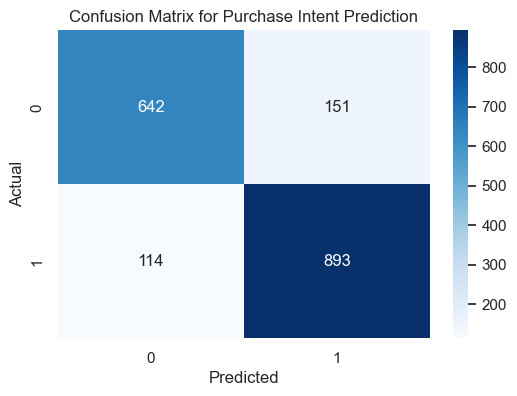

In [46]:
#creating a confusionn matrix
cm= confusion_matrix( y_test, y_pred)
plt.figure( figsize = ( 6,4 ))
sns.heatmap( cm, annot=True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix for Purchase Intent Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Top-left (True Negatives): Correctly predicted 0 (no intent).
# Bottom-right (True Positives): Correctly predicted 1 (intent).
# Off-diagonal (False Positives/Negatives): Errors.
# High numbers on the diagonal = good model.

### Modeling Insights
- **Performance**: Accuracy of 0.85 shows good prediction of purchase intent.
- **Key Metrics**: Precision of 0.86 means 86% of predicted repurchases are correct.
- **Business Impact**: Model can identify likely repeat buyers for targeted marketing.

                                   **THE END**